Ce notebook reproduit une partie du polycopié de travaux numériques de mécanique.

# Recherche de la solution approchée 

On va chercher une solution analytique approchée au problème du barrage à l'aide d'un calcul symbolique.

In [1]:
import sympy
sympy.init_printing()

D'abord, définissons quelques symboles.

In [2]:
x, y, U, V, l, h = sympy.symbols('x, y, U, V, l, h')

Ceci nous permet de définir le champ de déplacement $\xi$ :

In [3]:
xi = sympy.Matrix((U * y/h, V * y / h))

xi

⎡U⋅y⎤
⎢───⎥
⎢ h ⎥
⎢   ⎥
⎢V⋅y⎥
⎢───⎥
⎣ h ⎦

On peut calculer l'énergie potentielle associée à ce champ de déplacement, constituée de deux termes. Le premier est l'énergie des forces extérieures.

In [4]:
gamma_e, gamma = sympy.symbols('gamma_e, gamma')

La première composante vient des forces de gravité :

In [5]:
phi1 = sympy.integrate(-gamma * xi[1], (y, 0, h - x/l*h), (x, 0, l))
phi1

La deuxième vient des forces hydrostatiques de l'eau :

In [6]:
m = sympy.symbols('m')

In [7]:
phi2 = sympy.integrate(gamma_e * (m * h - y) * xi[0], (y, 0, m*h))
phi2

Il faut maintenant calcul le travail élastique. Construisons le tenseur epsilon :

In [8]:
grad_xi = sympy.Matrix([[sympy.diff(xi[0], x), sympy.diff(xi[0], y)],
                       [sympy.diff(xi[1], x), sympy.diff(xi[1], y)]])
grad_xi

⎡   U⎤
⎢0  ─⎥
⎢   h⎥
⎢    ⎥
⎢   V⎥
⎢0  ─⎥
⎣   h⎦

In [9]:
epsilon = 1 / sympy.S(2) * (grad_xi + grad_xi.transpose())
epsilon

⎡      U ⎤
⎢ 0   ───⎥
⎢     2⋅h⎥
⎢        ⎥
⎢ U    V ⎥
⎢───   ─ ⎥
⎣2⋅h   h ⎦

In [10]:
lambda_, mu = sympy.symbols('lambda, mu')

In [11]:
W = sympy.integrate(lambda_ / sympy.S(2) * epsilon.trace()**2 + mu * (epsilon * epsilon).trace(), (y, 0, h-x/l*h), (x, 0, l))
W

In [12]:
sympy.factor(W)

On peut maintenant minimiser en U et V la fonctionnelle suivante :

In [13]:
func = W - phi1 - phi2
func

On écrit qu'au point minimum, la dérivée s'annule, ce qui donne un système de deux équations à deux inconnues :

In [14]:
sympy.diff(func, U)

In [15]:
sympy.diff(func, V)

Que l'on peut résoudre :

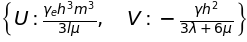

In [16]:
sols = sympy.solve([sympy.diff(func, U),
             sympy.diff(func, V)], (U, V))
sols

On peut maintenant dessiner dans un cas simple la déformée :

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

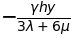

In [18]:
xi[1].subs(sols)

In [19]:
def plot_dam_solution():
    """Plots the dam problem solution."""
    l_, h_ = 0.5, 0.3
    gamma_e_ = 0.5
    gamma_ = 0.1
    mu_ = 0.2
    m_ = 1.
    lambda__ = 0.1
    A = (0,  0)
    B = (l_, 0)
    C = (0, h_)
    points = np.c_[A, B, C, A].T
    plt.plot(points[:, 0], points[:, 1], '-o', label='dam (original)')
    Cd = np.array(C)
    Cd[0] += xi[0].subs(sols).subs({gamma_e:gamma_e_, h:h_, l:l_, mu:mu_, m: m_, y:h_})
    Cd[1] += xi[1].subs(sols).subs({gamma_e:gamma_e_, h:h_, l:l_, mu:mu_, m: m_, y:h_, gamma: gamma_, lambda_: lambda__})
    points2 = np.c_[A, B, Cd, A].T
    plt.plot(points2[:, 0], points2[:, 1], '-o', label='dam (displaced)')
    plt.legend()

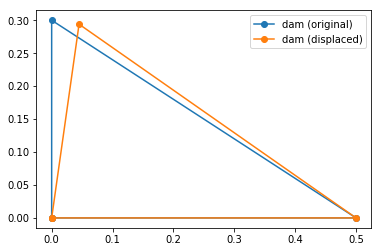

In [20]:
plot_dam_solution()

On peut également manipuler la solution de manière interactive :

In [21]:
from ipywidgets import interact

In [22]:
@interact
def plot_dam_solution(l_=0.5, 
                      h_=0.3,
                      gamma_e_ = 0.5,
                      gamma_ = 0.1,
                      mu_ = 0.2,
                      m_ = 1.,
                      lambda__ = 0.1):
    """Plots the dam problem solution."""
    
    A = (0,  0)
    B = (l_, 0)
    C = (0, h_)
    points = np.c_[A, B, C, A].T
    plt.plot(points[:, 0], points[:, 1], '-o', label='dam (original)')
    Cd = np.array(C)
    Cd[0] += xi[0].subs(sols).subs({gamma_e:gamma_e_, h:h_, l:l_, mu:mu_, m: m_, y:h_})
    Cd[1] += xi[1].subs(sols).subs({gamma_e:gamma_e_, h:h_, l:l_, mu:mu_, m: m_, y:h_, gamma: gamma_, lambda_: lambda__})
    points2 = np.c_[A, B, Cd, A].T
    plt.plot(points2[:, 0], points2[:, 1], '-o', label='dam (displaced)')
    plt.legend()

interactive(children=(FloatSlider(value=0.5, description='l_', max=1.5, min=-0.5), FloatSlider(value=0.3, description='h_', max=0.8999999999999999, min=-0.3), FloatSlider(value=0.5, description='gamma_e_', max=1.5, min=-0.5), FloatSlider(value=0.1, description='gamma_', max=0.30000000000000004, min=-0.1), FloatSlider(value=0.2, description='mu_', max=0.6000000000000001, min=-0.2), FloatSlider(value=1.0, description='m_', max=3.0, min=-1.0), FloatSlider(value=0.1, description='lambda__', max=0.30000000000000004, min=-0.1), Output()), _dom_classes=('widget-interact',))

Comme noté dans le guide, on peut remarquer que la solution trouvée n'est pas compatible avec les conditions cinématiques et statiques...

# Recherche de la solution approchée par éléments finis 

Todo : continuer la description pour l'élément de type 1 du maillage, puis l'élément 2 dans lequel on traite : l'énergie élastique, les efforts imposés et enfin le lagrangien pour imposer des déplacements dans la résolution du système.